# K-Nearest-Neighbor - Code

In diesem Notebook schauen wir uns den `KNeighborsClassifier` am Iris Datensatzes an.

## Setup

Setup Code muss *nicht* verstanden werden.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

In [2]:
from sklearn.preprocessing import OrdinalEncoder
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02, same_aspect=False, ax=None, delta=3):

    if isinstance(y, pd.Series):
        y = y.values

    if isinstance(X, pd.DataFrame):
        X = X.values

    order = ['Setosa', 'Virginica', 'Versicolor']

    palette=dict(zip(
        order,
        sns.color_palette()
    ))

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - delta, X[:, 0].max() + delta
    x2_min, x2_max = X[:, 1].min() - delta, X[:, 1].max() + delta
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = OrdinalEncoder(categories=[order]).fit_transform(Z.reshape(-1, 1))
    Z = Z.reshape(xx1.shape)


    plt.autoscale(True)
    ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=palette, ax=ax, zorder=10)

    plt.autoscale(False)
    ax.contourf(xx1, xx2, Z, alpha=0.4, cmap=ListedColormap(palette.values()))

    if same_aspect:
        plt.gca().set_aspect('equal', adjustable='box')

    _ = ax.set_xlabel('petal length (cm)')
    _ = ax.set_ylabel('petal width (cm)')
    return ax

In [3]:
# sepal length,sepal width,petal length,petal width,name
df = pd.read_csv('data/iris.csv')[['petal length', 'petal width', 'name']].rename(columns={
    'petal length': 'petal length (cm)',  # petal = Blütenblatt
    'petal width': 'petal width (cm)',
})

## Train-Validation Split

Teile Daten in Train-Set und Validation-Set.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df[['petal length (cm)', 'petal width (cm)']], df['name'], test_size=0.2)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(120, 2) (30, 2) (120,) (30,)


## KNeighborsClassifier

`K-Nearest-Neighbors` sucht die nächsten Punkte im Train-Set über die Euklidische-Distanz. Damit die Einheit der Messung keine Rolle spielt, müssen die Daten darum noch `standard skaliert` werden.

In [5]:
model = Pipeline([
    ('std', StandardScaler()),
    ('clf', KNeighborsClassifier())
])
model.fit(X_train, y_train)

Pipeline(steps=[('std', StandardScaler()), ('clf', KNeighborsClassifier())])

Visualisierung des Modells:

/Users/beni/IdeaProjects/cas-machine-learning-slides/code-examples/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


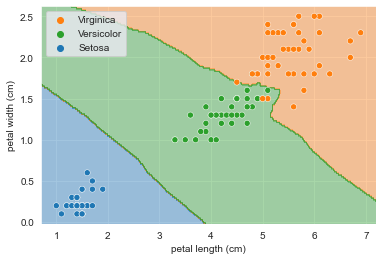

In [6]:
plot_decision_regions(X_train, y_train, model)
plt.show()

Evaluation auf Train-Set und Val-Set

In [7]:
y_train_hat = model.predict(X_train)
accuracy_score_train = accuracy_score(y_train, y_train_hat)
print("Train Set:", f"{accuracy_score_train*100}%")

y_val_hat = model.predict(X_val)
accuracy_score_val = accuracy_score(y_val, y_val_hat)
print("Val Set:", f"{accuracy_score_val*100}%")

Train Set: 96.66666666666667%
Test Set: 96.66666666666667%
